In [68]:
import uproot3 as uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [69]:
dump_file = "../dump_run9337.csv"
res_file = "../output/residuals/Run_2/run9337_cosmics_timing_residuals.csv"

In [70]:
voltageRUN2 = "../inputs/pmt_voltage_20221219.csv"

In [71]:
dfres = pd.read_csv(res_file)
df = pd.read_csv(dump_file)

In [72]:
res_file2 = "../output/residuals/Run_2/run10085_cosmics_timing_residuals.csv"
res_file1 = "../output/residuals/Run_2/run9730_cosmics_timing_residuals.csv"
df1 = pd.read_csv(res_file1)
df2 = pd.read_csv(res_file2)

In [73]:
dfres.head()

,channel_id,x,y,z,entries,pecut,mean_residual_ns,std_residual_ns,emean_ns
0,0,-371.0701,-76.25,-872.9003,37.0,300.0,3.1575,2.7448,0.0742
1,1,-371.0700,29.35,-872.9002,18.0,300.0,1.4185,1.4582,0.0810
2,2,-371.0700,-129.05,-823.0199,15.0,300.0,1.2772,2.1193,0.1413
3,3,-371.0701,-23.45,-823.0197,48.0,300.0,1.9101,2.2076,0.0460
4,4,-371.0701,82.15,-823.0197,54.0,300.0,-0.0428,2.2558,0.0418


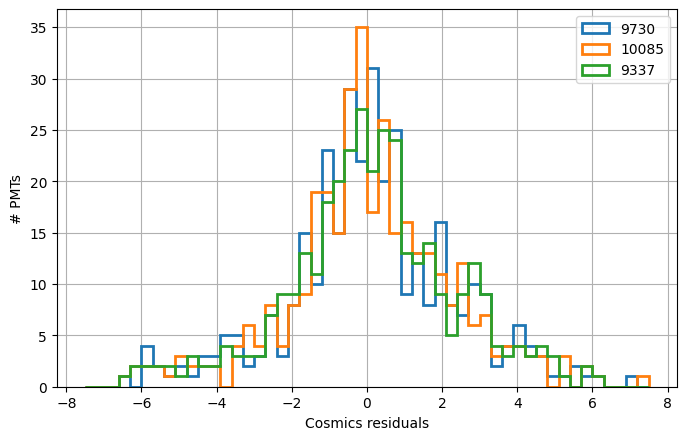

In [74]:
fig = plt.figure(figsize=(8,5),dpi=100)

mi,ma = -7.5,7.5
b = 0.3
n = int((ma-mi)/b)
plt.hist(df1["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",label="9730")
plt.hist(df2["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",label="10085")
plt.hist(dfres["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step", label="9337")

plt.grid()
plt.xlabel("Cosmics residuals")
plt.ylabel("# PMTs")
plt.legend()
plt.show()

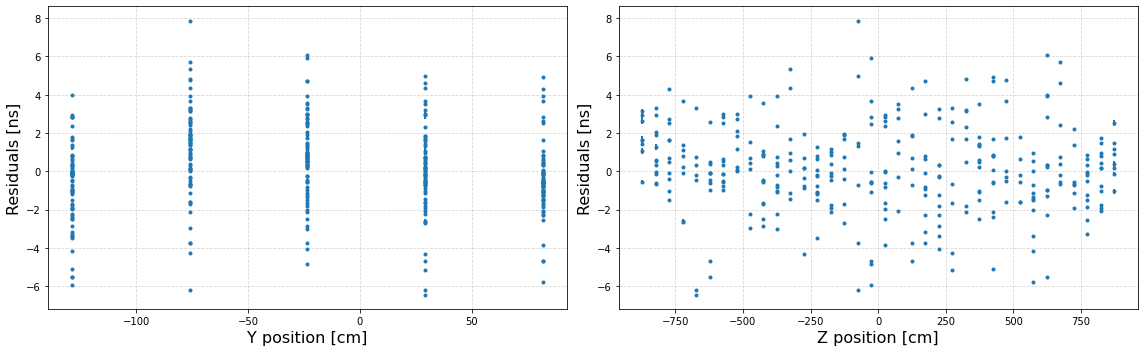

In [75]:
fig, ax = plt.subplots(1,2, figsize=(16, 5))
ax[0].errorbar( x=dfres.y, y=dfres.mean_residual_ns, yerr=dfres.emean_ns, marker='.', elinewidth=2.0, lw=0 )
ax[1].errorbar( x=dfres.z, y=dfres.mean_residual_ns, yerr=dfres.emean_ns, marker='.', elinewidth=2.0, lw=0 )
ax[0].set_ylabel("Residuals [ns]", fontsize=16)
ax[1].set_ylabel("Residuals [ns]", fontsize=16)
ax[0].set_xlabel("Y position [cm]", fontsize=16)
ax[1].set_xlabel("Z position [cm]", fontsize=16)
plt.tight_layout()
ax[0].grid(alpha=0.5,linestyle="dashed")
ax[1].grid(alpha=0.5,linestyle="dashed")
plt.show()

In [76]:
#outliers
ch_high = dfres[dfres.mean_residual_ns>2].channel_id.to_numpy()
res_high = dfres[dfres.mean_residual_ns>2].mean_residual_ns.to_numpy()
ch_low = dfres[dfres.mean_residual_ns<-2].channel_id.to_numpy()
res_low = dfres[dfres.mean_residual_ns<-2].mean_residual_ns.to_numpy()

In [77]:
print(ch_high)
print(res_high)

[  0   6  10  13  16  18  20  23  25  26  28  29  40  41  42  43  44  50
  53  56  58  60  61  63  66  68  69  75  76  77  78  79  88  90  91  92
  93  96  97  98 105 107 108 109 183 225 226 227 228 229 240 241 260 313
 316 318 323 326 328 337 347 348]
[3.1575 2.5051 3.3016 2.5494 3.0188 2.1277 3.9095 3.5796 2.3777 3.9166
 5.333  4.3412 7.8788 4.9928 2.8107 5.9351 3.6882 4.3508 4.7354 2.7921
 2.597  4.8394 3.2103 3.5021 4.6968 4.7552 3.6946 3.9986 6.0585 2.8465
 5.7325 4.6373 2.5128 2.6282 2.9231 2.9385 3.2847 2.735  4.3218 3.6755
 2.8139 2.5195 2.7157 3.0008 2.0728 2.8114 2.9458 2.6428 3.2512 3.5284
 3.1658 2.3285 2.2095 2.4478 2.3874 2.7852 2.9939 3.2637 3.2879 4.9055
 3.9578 2.4085]


In [78]:
print(ch_low)

[ 31  32  37  39  47  49  72  73  74  82  84  87 100 101 102 104 110 111
 112 113 115 116 135 145 150 153 155 156 162 165 189 220 221 222 223 224
 230 231 232 233 234 235 236 237 238 239 279 335 345]


In [79]:
# what about the other 2 runs?
ch_high1 = df1[df1.mean_residual_ns>4].channel_id.to_numpy()
res_high1 = df1[df1.mean_residual_ns>4].mean_residual_ns.to_numpy()
ch_low1 = df1[df1.mean_residual_ns<-4].channel_id.to_numpy()
res_low1 = df1[df1.mean_residual_ns<-4].mean_residual_ns.to_numpy()
ch_high2 = df2[df2.mean_residual_ns>4].channel_id.to_numpy()
res_high2 = df2[df2.mean_residual_ns>4].mean_residual_ns.to_numpy()
ch_low2 = df2[df2.mean_residual_ns<-4].channel_id.to_numpy()
res_low2 = df2[df2.mean_residual_ns<-4].mean_residual_ns.to_numpy()
print("HIGH OUTLIERS")
print(ch_high,'\n', ch_high1,'\n', ch_high2)
print("LOW OUTLIERS")
print(ch_low,'\n', ch_low1,'\n', ch_low2)

HIGH OUTLIERS
[  0   6  10  13  16  18  20  23  25  26  28  29  40  41  42  43  44  50
  53  56  58  60  61  63  66  68  69  75  76  77  78  79  88  90  91  92
  93  96  97  98 105 107 108 109 183 225 226 227 228 229 240 241 260 313
 316 318 323 326 328 337 347 348] 
 [ 28  29  40  41  43  50  66  68  76  78  97 321 337 347] 
 [ 28  29  40  41  43  44  50  60  66  68  76  78  79 225 337 347]
LOW OUTLIERS
[ 31  32  37  39  47  49  72  73  74  82  84  87 100 101 102 104 110 111
 112 113 115 116 135 145 150 153 155 156 162 165 189 220 221 222 223 224
 230 231 232 233 234 235 236 237 238 239 279 335 345] 
 [ 72  74 100 101 102 104 221 222 223 224 231 236 238 239 335 345] 
 [ 31  72  74 100 101 102 104 221 222 223 224 231 236 239 335 345]


In [80]:
interpolated_run2 = [0, 12,  22,  43,  48,  53,  54,  57,  60,  62,  66,  67,  68,  69,  77,  79,  81,  82,
  83,  84,  85,  87,  89,  94, 105, 111, 128, 157, 171, 172, 173, 174, 176, 177, 208, 218,
 231, 239, 271, 279, 291, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 319, 334, 347,
 348, 353 ]

for ch in interpolated_run2:
    if ch in ch_high:
        print( ch)
    if ch in ch_low:
        print( ch)

0
43
53
60
66
68
69
77
79
82
84
87
105
111
231
239
279
347
348


In [81]:
df.head()

,entry,run,event,timestamp,flash_id,flash_time,flash_y,flash_width_y,flash_z,flash_width_z,...,trackEndY,trackEndZ,trackDirX,trackDirY,trackDirZ,trackLenght,channel_id,intercept,slope,residuals
0,6,9337,28861,1672381408,6,-220.45932,-21.882273,76.03247,484.80096,137.30408,...,-180.327,624.449,0.09921,-0.792326,0.601977,440.004,61,-220.454707,0.000013,0.003581
1,6,9337,28861,1672381408,6,-220.45932,-21.882273,76.03247,484.80096,137.30408,...,-180.327,624.449,0.09921,-0.792326,0.601977,440.004,63,-220.454707,0.000013,0.005019
2,6,9337,28861,1672381408,6,-220.45932,-21.882273,76.03247,484.80096,137.30408,...,-180.327,624.449,0.09921,-0.792326,0.601977,440.004,64,-220.454707,0.000013,-0.002077
3,6,9337,28861,1672381408,6,-220.45932,-21.882273,76.03247,484.80096,137.30408,...,-180.327,624.449,0.09921,-0.792326,0.601977,440.004,66,-220.454707,0.000013,0.003578
4,6,9337,28861,1672381408,6,-220.45932,-21.882273,76.03247,484.80096,137.30408,...,-180.327,624.449,0.09921,-0.792326,0.601977,440.004,67,-220.454707,0.000013,-0.003953


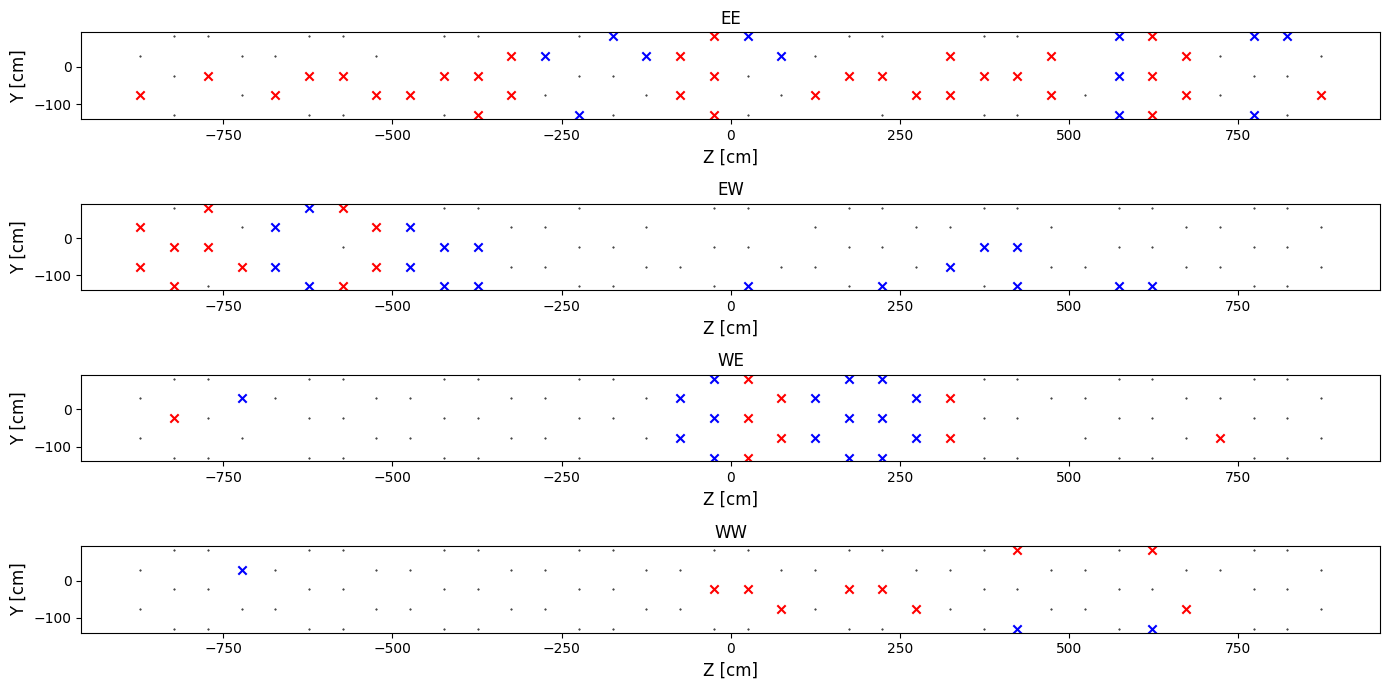

In [82]:
fig, ax = plt.subplots(4,figsize=(14,7),dpi=100)
names = [ "EE", "EW", "WE", "WW"]

for ch in range(0,360):

    _sel = dfres.channel_id == ch
    if ch<90:
        ax[0].scatter(dfres[_sel].z, dfres[_sel].y, color="black", s=0.2)
        if ch in ch_high:
            ax[0].scatter(dfres[_sel].z, dfres[_sel].y, color="red", marker="x")
        elif ch in ch_low:
            ax[0].scatter(dfres[_sel].z, dfres[_sel].y, color="blue", marker="x")
            
    elif ch<180:
        ax[1].scatter(dfres[_sel].z, dfres[_sel].y, color="black", s=0.2)
        if ch in ch_high:
            ax[1].scatter(dfres[_sel].z, dfres[_sel].y, color="red", marker="x")
        elif ch in ch_low:
            ax[1].scatter(dfres[_sel].z, dfres[_sel].y, color="blue", marker="x")
            
    elif ch<270:
        ax[2].scatter(dfres[_sel].z, dfres[_sel].y, color="black", s=0.2)
        if ch in ch_high:
            ax[2].scatter(dfres[_sel].z, dfres[_sel].y, color="red", marker="x")
        elif ch in ch_low:
            ax[2].scatter(dfres[_sel].z, dfres[_sel].y, color="blue", marker="x")
    
    elif ch<360:
        ax[3].scatter(dfres[_sel].z, dfres[_sel].y, color="black", s=0.2)
        if ch in ch_high:
            ax[3].scatter(dfres[_sel].z, dfres[_sel].y, color="red", marker="x")
        elif ch in ch_low:
            ax[3].scatter(dfres[_sel].z, dfres[_sel].y, color="blue", marker="x")
    
for i in range(0,4): 
    ax[i].set_title(names[i])
    ax[i].set_xlabel("Z [cm]",fontsize=12)
    ax[i].set_ylabel("Y [cm]", fontsize=12) 

fig.tight_layout()
plt.show()

## LOOKING AT A SINGLE CHANNEL

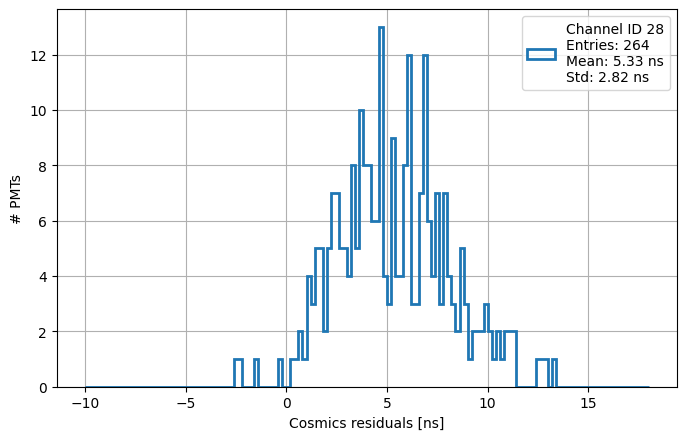

In [83]:
fig = plt.figure(figsize=(8,5),dpi=100)

channel = 28
mi,ma = -10.,18.
b = 0.2
n = int((ma-mi)/b)

residuals = df[df.channel_id==channel].residuals.to_numpy()

lab = "Channel ID "+str(channel)+"\n"
lab += "Entries: {}\n".format(len(residuals))
lab += "Mean: {:.2f} ns\n".format(np.mean(residuals*1e3))
lab += "Std: {:.2f} ns".format(np.std(residuals*1e3))

plt.hist(df[df.channel_id==channel].residuals*1e3, bins=n, range=(mi,ma), lw=2, histtype="step", label=lab)

plt.grid()
plt.xlabel("Cosmics residuals [ns]")
plt.ylabel("# PMTs")
plt.savefig("ch{}_residuals.png".format(channel))
plt.legend()
plt.show()

In [84]:
# list of unique events/flashes with ch 28
df[df.channel_id==channel][["event","flash_id","intercept","slope"]].head(264)

,event,flash_id,intercept,slope
40,29821,3,-606.358555,-0.000057
344,30569,3,-410.355504,-0.000025
522,20913,0,-362.105674,-0.000074
575,20997,7,335.984341,-0.000037
794,22821,9,227.863246,-0.000094
...,...,...,...,...
31045,37741,1,-0.604052,-0.000020
31116,11464,4,260.028928,-0.000007
31227,13432,10,173.790358,-0.000034
31359,14271,2,-585.393511,-0.000016


In [85]:
dfres[dfres.channel_id==channel][["channel_id","x","y","z"]].head()

,channel_id,x,y,z
26,28,-371.0703,-76.25,-324.2194


In [86]:
import sqlite3
def readSqlitedb(database="/cvmfs/icarus.opensciencegrid.org/products/icarus/icarus_data/v09_78_00/icarus_data/database/ChannelMapICARUS_20230829.db", table="pmt_placements"):

    # Read sqlite query results into a pandas DataFrame
    con = sqlite3.connect(database)
    df = pd.read_sql_query("SELECT * from {}".format(table), con)
    con.close()
    return df

def getChannelsFromBoard(board):
    geo = readSqlitedb()
    channels = geo[geo.digitizer_label==board].channel_id.to_numpy()
    return channels

def getBoardFromChannel(channel):
    geo = readSqlitedb()
    board = geo[geo.channel_id==channel].digitizer_label.values[0]
    return board

def getDigitizerChannelFromChannel(channel):
    geo = readSqlitedb()
    dig_ch = geo[geo.channel_id==channel].digitizer_ch_number.values[0]
    return dig_ch

def getChannelFromPMTid(pmt):
    geo = readSqlitedb()
    channel = geo[geo.pmt_id==pmt].channel_id.values[0]
    return channel

def getSignalCableFromChannel(channel):
    geo = readSqlitedb()
    cable = geo[geo.channel_id==channel].signal_cable_label.values[0]
    return cable

In [87]:
boards = []
for ch in ch_high:
    boards.append( getBoardFromChannel(ch))

In [88]:
print ( boards )

['EE-BOT-C', 'EE-BOT-C', 'EE-BOT-B', 'EE-BOT-B', 'EE-BOT-C', 'EE-BOT-C', 'EE-BOT-B', 'EE-BOT-B', 'EE-BOT-B', 'EE-BOT-B', 'EE-BOT-B', 'EE-BOT-B', 'EE-TOP-C', 'EE-TOP-C', 'EE-TOP-C', 'EE-TOP-C', 'EE-TOP-C', 'EE-TOP-C', 'EE-TOP-C', 'EE-TOP-C', 'EE-TOP-C', 'EE-TOP-B', 'EE-TOP-B', 'EE-TOP-B', 'EE-TOP-B', 'EE-TOP-B', 'EE-TOP-B', 'EE-TOP-B', 'EE-TOP-B', 'EE-TOP-B', 'EE-TOP-B', 'EE-TOP-B', 'EE-TOP-A', 'EW-BOT-C', 'EW-BOT-C', 'EW-BOT-C', 'EW-BOT-C', 'EW-BOT-C', 'EW-BOT-C', 'EW-BOT-C', 'EW-BOT-C', 'EW-BOT-C', 'EW-BOT-C', 'EW-BOT-C', 'WE-BOT-C', 'WE-BOT-A', 'WE-BOT-A', 'WE-BOT-A', 'WE-BOT-A', 'WE-BOT-A', 'WE-TOP-B', 'WE-TOP-B', 'WE-TOP-A', 'WW-TOP-C', 'WW-BOT-A', 'WW-BOT-A', 'WW-TOP-C', 'WW-TOP-C', 'WW-TOP-C', 'WW-TOP-B', 'WW-TOP-B', 'WW-TOP-B']


### INVESTIGATING SINGLE FLASH
Channel 28 misbehaves: let's look deeply at one event in which it does.
```
EVENT=30569
CRYO=0
FLASH=3
```
This was checked with the event-display, but nothing seems out of the ordinary... let's look at how the flash is being built...

In [89]:
LIGHTINFO = "../inputs/run9337_tracks_BNBMAJORITY_files.txt"
FILENAMES = [ line.strip() for line in open(LIGHTINFO, "r") ]
maxim = 4

In [90]:
def loadSingleFile( tfile, treename, flatenndf=False ):
    ttree = uproot.open(tfile)
    data = ttree[treename].arrays(outputtype=pd.DataFrame,flatten=flatenndf)
    return data

file = FILENAMES[3]

flashes = loadSingleFile( file, "simpleLightAna/opflashCryoE_flashtree")
flashes.drop(columns=["multiplicity","multiplicity_right","multiplicity_left","sum_pe","sum_pe_right","sum_pe_left"],inplace=True)
flashes["channel_id"] = flashes.pmt_y.apply( lambda x : np.arange(len(x)) )
flashes = flashes.explode(["time_pmt", "pmt_x", "pmt_y", "pe_pmt", "pmt_z", "channel_id","amplitude_pmt"])

hits = loadSingleFile( file, "simpleLightAna/opflashCryoE_ophittree")

In [91]:
EVENT=30569
FLASH=3

In [92]:
flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>0)].head()

,run,event,timestamp,flash_id,flash_time,flash_y,flash_width_y,flash_z,flash_width_z,pmt_x,pmt_y,pmt_z,time_pmt,pe_pmt,amplitude_pmt,channel_id
entry,,,,,,,,,,,,,,,,
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-76.25,-872.900024,-410.326982,3.441883,487.8,0
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-129.050003,-823.02002,-410.323816,3.869212,389.8,2
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-23.450001,-823.02002,-410.30289,1.841913,522.0,3
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,82.150002,-823.02002,-410.24529,2.249133,41.6,4
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-23.450001,-773.140015,-410.327746,9.302574,127.8,6


In [93]:
hits[(hits.event==EVENT)&(hits.flash_id==FLASH)].head()

,run,event,timestamp,flash_id,channel_id,integral,amplitude,start_time,abs_start_time,pe,width,fast_to_total
entry,,,,,,,,,,,,
67001,9337,30569,1672384469,3,9,338.000000,52.000000,-409.386383,1090.613647,1.062038,0.058,0.0
67002,9337,30569,1672384469,3,102,679.000000,63.200001,-409.390350,1090.609619,2.133502,0.048,0.0
67003,9337,30569,1672384469,3,134,494.200012,46.200001,-409.401184,1090.598877,1.552838,0.050,0.0
67004,9337,30569,1672384469,3,30,6421.600098,77.599998,-409.404572,1090.595459,20.177467,0.390,0.0
67005,9337,30569,1672384469,3,109,1408.199951,94.800003,-409.411011,1090.588989,4.424740,0.076,0.0


In [94]:
# QUESTION: does it contain only the first hit of each PMT or the full thing:
all_chs = hits[(hits.event==EVENT)&(hits.flash_id==FLASH)].channel_id.to_numpy()
all_chs_unique = np.unique(hits[(hits.event==EVENT)&(hits.flash_id==FLASH)].channel_id.to_numpy())

print(len(all_chs), len(all_chs_unique))
#apparently it's not just the first one then since the two numbers are different

258 107


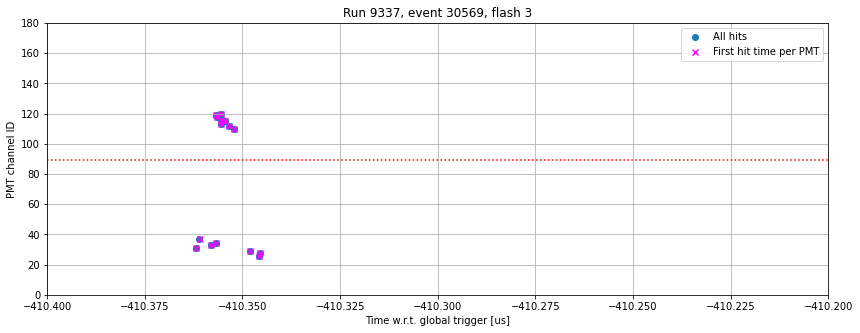

In [95]:
PE_CUT = 300

chs = hits[(hits.event==EVENT)&(hits.pe>PE_CUT)].channel_id.to_numpy()
starts = hits[(hits.event==EVENT)&(hits.pe>PE_CUT)].start_time.to_numpy()

fchs = flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>PE_CUT)].channel_id.to_numpy()
fstarts = flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>PE_CUT)].time_pmt.to_numpy()
fys = flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>PE_CUT)].pmt_y.to_numpy()
fpes = flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>PE_CUT)].pe_pmt.to_numpy()
famps = flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>PE_CUT)].amplitude_pmt.to_numpy()

#print(ch, tt)
fig = plt.figure(figsize=(14, 5))
plt.scatter(starts, chs, marker="o", label="All hits" )
plt.scatter(fstarts, fchs, marker="x", color="magenta", label="First hit time per PMT")

#plt.axvline(x=0,color="red",linestyle="dotted",label="Global trigger")
plt.axhline(y=89,color="red",linestyle="dotted")

plt.xlim((-410.4,-410.2))
plt.ylim((0,180)) #EAST ONLY

plt.grid()
plt.title("Run {}, event {}, flash {}".format(9337, EVENT, FLASH))
plt.xlabel("Time w.r.t. global trigger [us]")
plt.ylabel("PMT channel ID")
plt.legend()

plt.show()

In [96]:
bchs, bstarts, bys, bamps = [], [], [], []
for i,ch in enumerate(fchs):
    if fstarts[i] > -410.350:
        print(ch, fstarts[i], fys[i], famps[i], getBoardFromChannel(ch))
        bchs.append(ch)
        bstarts.append(fstarts[i])
        bys.append(fys[i])
        bamps.append(famps[i])

26 -410.3458809999998 -23.45 1275.0 EE-BOT-B
28 -410.3455739999998 -76.25 609.3999999999996 EE-BOT-B
29 -410.347992 29.35 491.7999999999993 EE-BOT-B


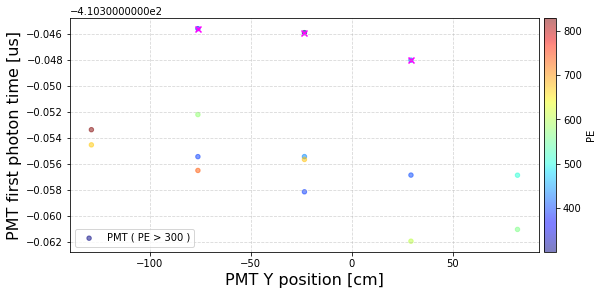

In [97]:
fig, ax = plt.subplots( 1,1, figsize=(10, 4.3) )

out = ax.scatter( fys, fstarts, c=fpes, s=20, label='PMT ( PE > {} )'.format(PE_CUT), cmap='jet', alpha=0.5 )
fig.colorbar( out, ax=ax, label="PE", pad=0.01 )

#res = stats.linregress( evtmdf.pmt_y, evtmdf.weight_mean_time ) 
#ax.plot( np.linspace(-150, 100),  np.linspace(-150, 100)*res.slope+res.intercept, lw=2.0, color='red', label='Time fit' )

ax.scatter(bys,bstarts,color="magenta",marker="x")

ax.set_ylabel("PMT first photon time [us]", fontsize=16)
ax.set_xlabel("PMT Y position [cm]", fontsize=16)
ax.grid(alpha=0.5, linestyle="dashed")
ax.legend()
ax.legend(loc='lower left')

#### GO DEEPER INTO WAVEFORMS

In [98]:
wffile = "/icarus/data/users/mvicenzi/pmt-info/runs/9337/dumpWaveforms_run9337.root"
laser9305 = "../inputs/laser_time_corrections_9305.csv"
waveforms = loadSingleFile( wffile, "waveforms/wftree")
dflaser = pd.read_csv(laser9305,sep=",")

In [99]:
waveforms[(waveforms.event==30569)&(waveforms.channel_id==28)].head(20)

,run,event,timestamp,channel_id,tstart,nsize,wf
entry,,,,,,,
104944,9337,30569,1672384469,28,790.266,5000,"[14783, 14784, 14783, 14783, 14785, 14785, 147..."
104945,9337,30569,1672384469,28,821.514,5000,"[14786, 14785, 14776, 14782, 14785, 14780, 147..."
104946,9337,30569,1672384469,28,903.034,5000,"[14786, 14784, 14785, 14784, 14785, 14781, 147..."
104947,9337,30569,1672384469,28,1061.658,5000,"[14776, 14785, 14781, 14778, 14784, 14780, 147..."
104948,9337,30569,1672384469,28,1087.322,5000,"[14782, 14784, 14780, 14785, 14785, 14780, 147..."
104949,9337,30569,1672384469,28,1163.946,5000,"[14785, 14783, 14784, 14786, 14783, 14783, 147..."
104950,9337,30569,1672384469,28,1333.994,5000,"[14784, 14787, 14781, 14780, 14780, 14786, 147..."
104951,9337,30569,1672384469,28,1492.314,12960,"[14784, 14781, 14779, 14780, 14784, 14783, 147..."
104952,9337,30569,1672384469,28,1695.018,5000,"[14778, 14779, 14784, 14783, 14782, 14788, 147..."


In [100]:
def plot_wfs(data, laser, ev, flash_time, channel,chtime):
    
    t0 = 0
    tend = 0
    c = -laser[laser.channel_id==channel].t_signal.values[0]/1000
    
    for t in waveforms[(waveforms.event==ev)&(waveforms.channel_id==channel)].tstart.to_numpy():
        nsize = waveforms[(waveforms.event==ev)&(waveforms.channel_id==channel)].nsize.values[0]
        tend = t + nsize*0.002 + c
        if t+c < flash_time and tend > flash_time:
            t0 = t+c
            break
    
    wf = waveforms[(waveforms.event==ev)&(waveforms.channel_id==channel)&(waveforms.tstart==t0-c)].wf.values[0]
    tt = np.arange(t0, tend-0.002, 0.002)
    
    ipeak = np.argmin(wf)
    tpeak = tt[ipeak]
    
    fig = plt.figure(figsize=(14, 5))
    
    plt.plot( tt*1000, wf, label="PMT ch "+str(channel))
    plt.axvline(x=(chtime+1500)*1000, color="red", label="First hit time for {}".format(channel))
    plt.axvline(x=tpeak*1000, color="red", label="Peak for {}".format(channel), linestyle="dotted")
    plt.axvspan(xmin=flash_time*1000, xmax=(flash_time+1)*1000, color="green", alpha=0.1, label="Flash excl. zone")

    plt.ylabel("Amplitude [ADC #]")
    plt.xlabel("Time [ns]")
    plt.xlim((1089.6*1000,1089.8*1000))
    plt.legend()
    plt.grid()
    plt.savefig("../figs/validation_run9337_single_flash_ch{}.png".format(channel),dpi=100)
    plt.show()
    
    return tpeak

In [101]:
print(fchs,fstarts)

[26 28 29 31 33 34 37 110 112 113 115 116 118 119 120] [-410.3458809999998 -410.3455739999998 -410.347992 -410.361912
 -410.35811699999994 -410.3568389999998 -410.36100799999997 -410.352178
 -410.35334099999983 -410.35540899999984 -410.35450699999984
 -410.3556289999998 -410.3564739999998 -410.3568299999998
 -410.3554129999998]


Flash w.r.t. trigger: 1089.642273 us


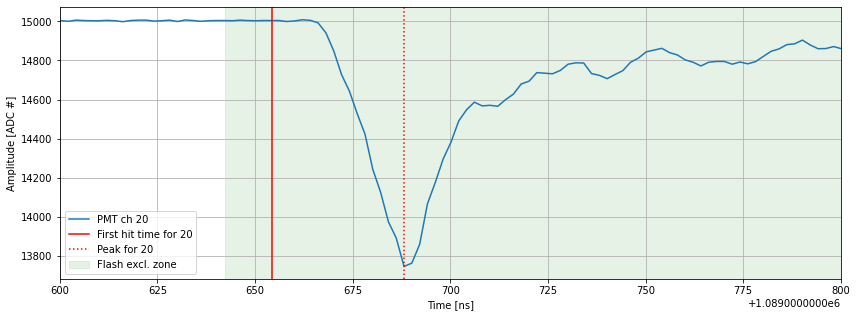

1089.6881569999382

In [102]:
CHANNEL = 20
FLASHT = -410.357727+1500
print("Flash w.r.t. trigger: {} us".format(FLASHT))

plot_wfs(waveforms, dflaser, EVENT, FLASHT, CHANNEL, bstarts[1])

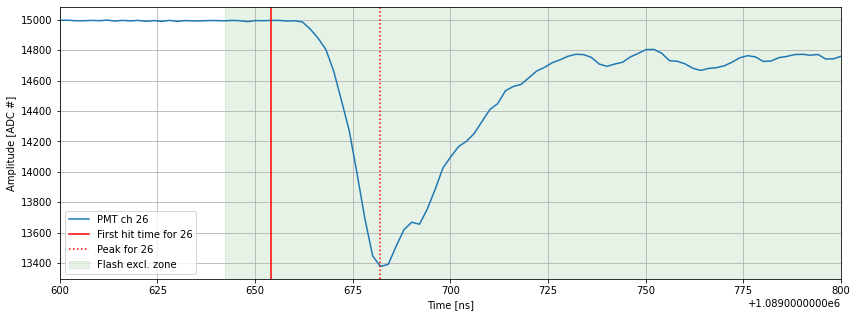

1089.6541190000003 1089.6821189999384 27.99999993817437


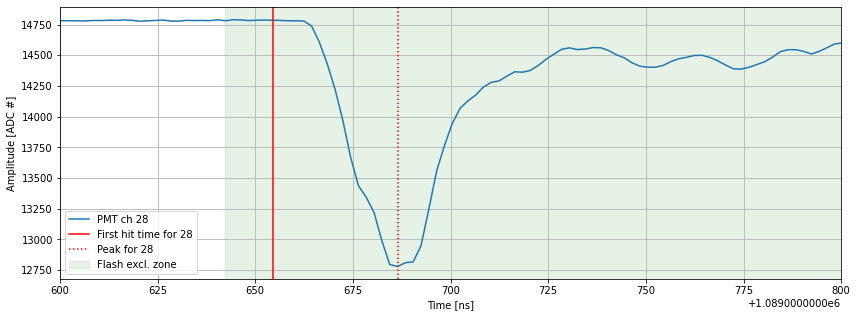

1089.6544260000003 1089.6864259999384 31.99999993807978


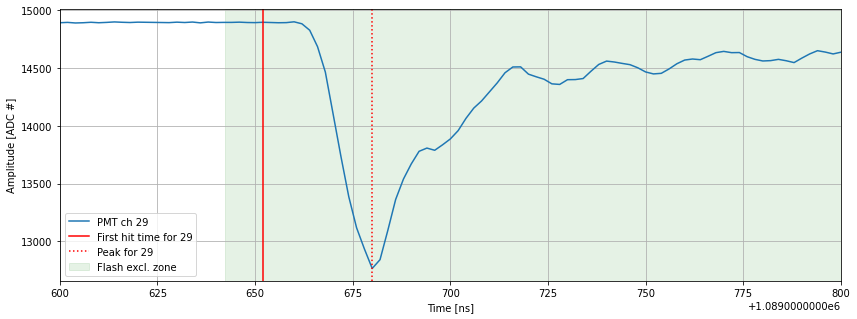

1089.652008 1089.6800079999384 27.999999938401743


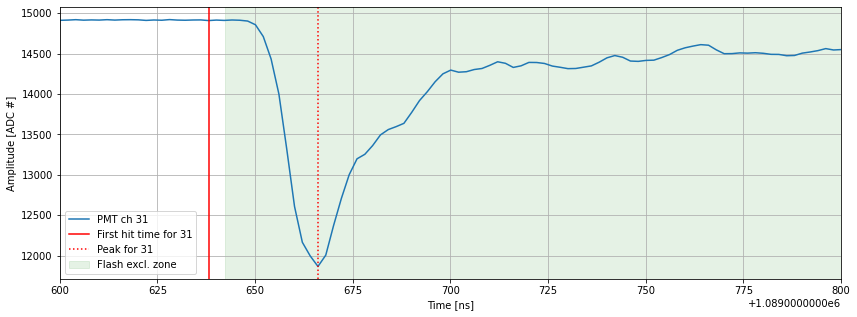

1089.638088 1089.6660879999372 27.999999937264874


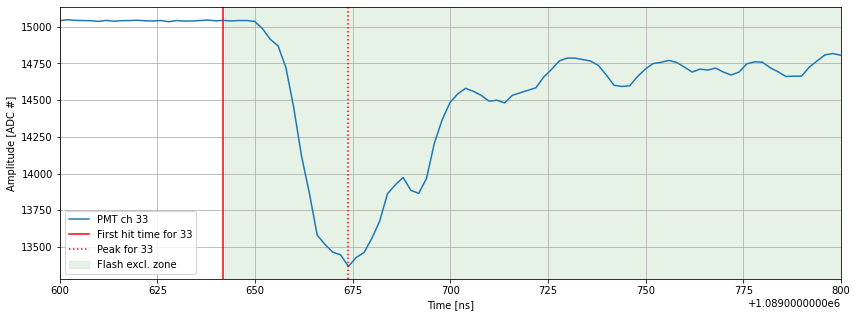

1089.641883 1089.6738829999372 31.999999937170287


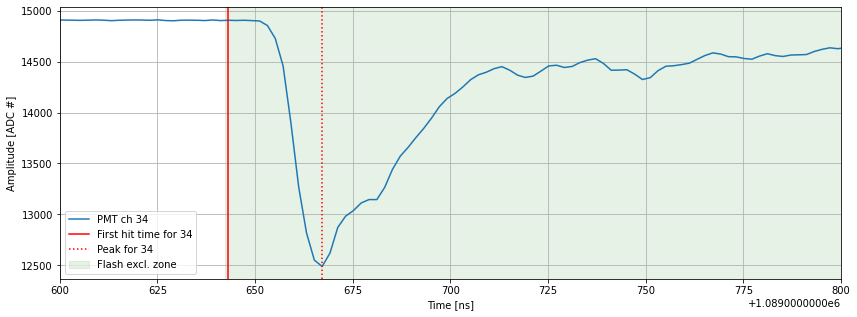

1089.6431610000002 1089.6671609999373 23.99999993713209


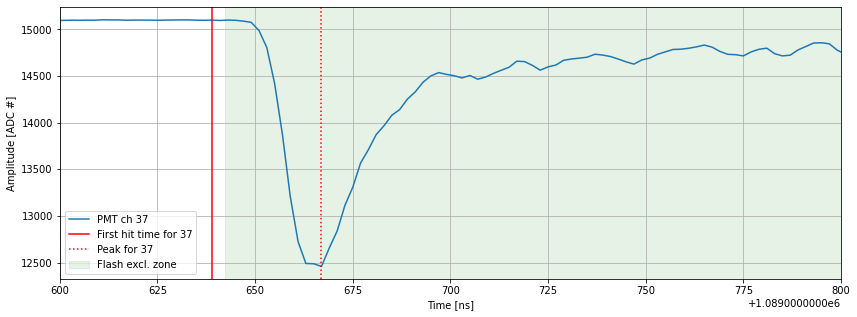

1089.6389920000001 1089.6669919999374 27.999999937492248


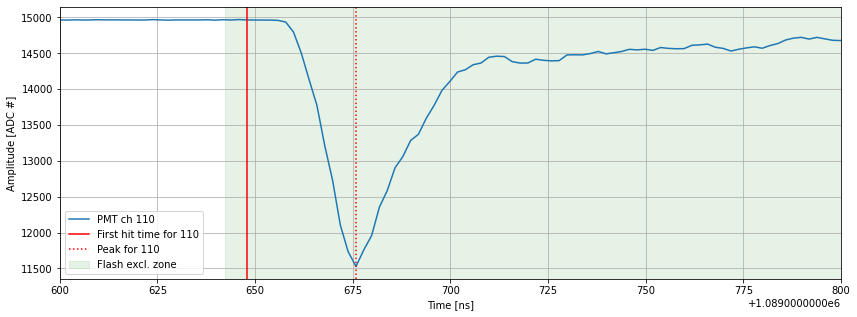

1089.647822 1089.6758219999383 27.999999938401743


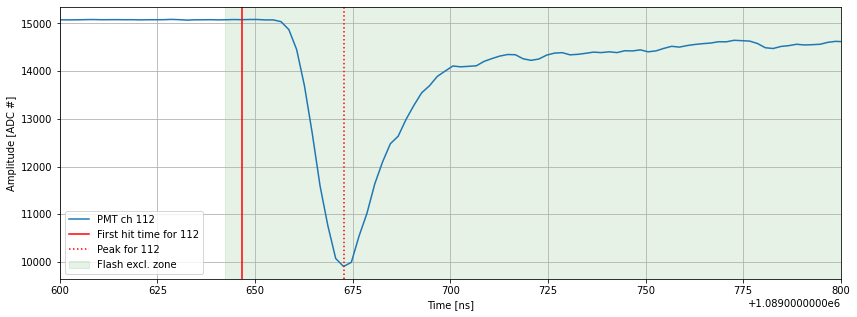

1089.6466590000002 1089.6726589999384 25.999999938221663


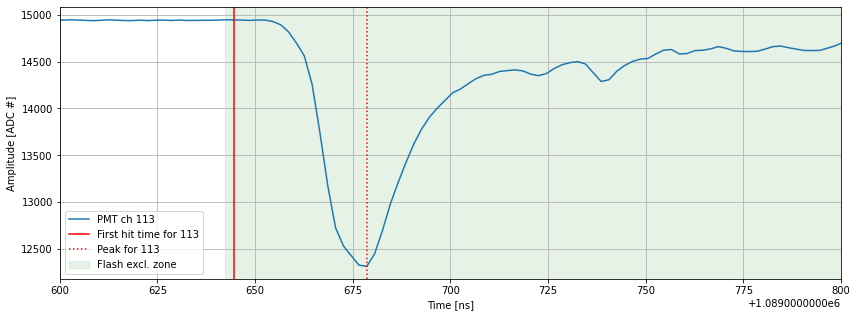

1089.6445910000002 1089.6785909999383 33.99999993803249


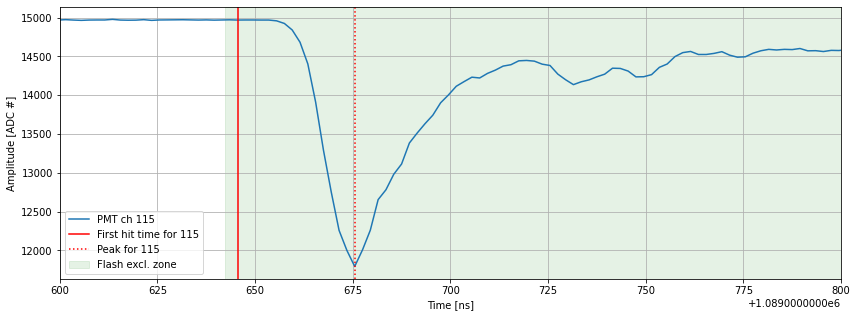

1089.6454930000002 1089.6754929999383 29.999999938127075


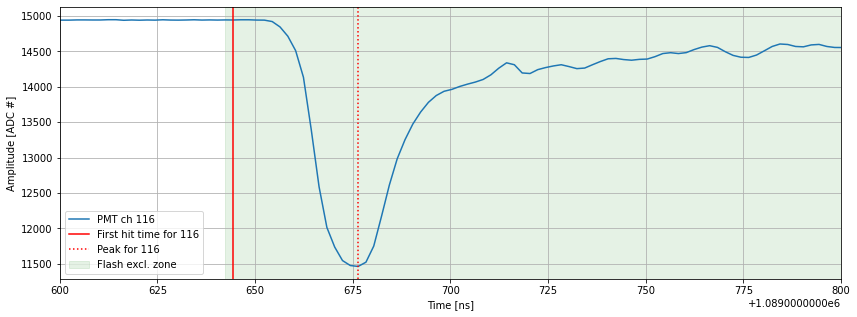

1089.6443710000003 1089.6763709999382 31.999999937852408


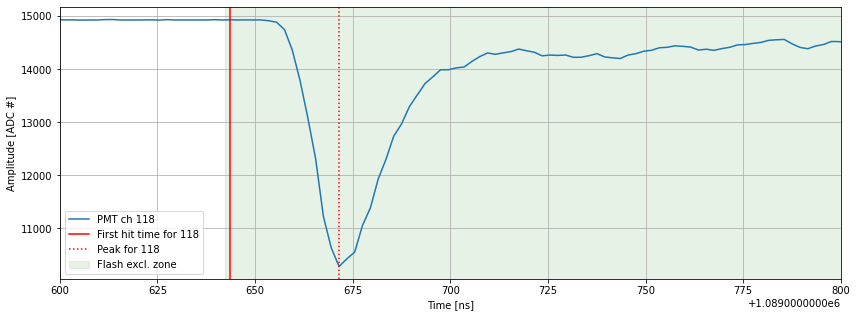

1089.6435260000003 1089.6715259999385 27.999999938401743


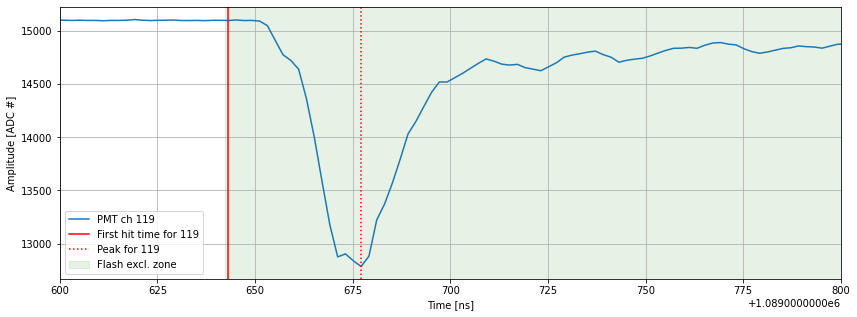

1089.6431700000003 1089.6771699999383 33.99999993803249


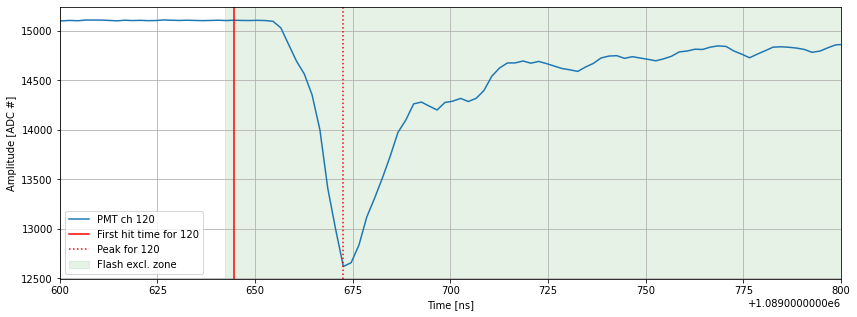

1089.6445870000002 1089.6725869999373 27.9999999370375


In [103]:
ftpeaks = []
ftdiff= []
for i,ch in enumerate(fchs):
    tpeak = plot_wfs(waveforms, dflaser, EVENT, FLASHT, ch, fstarts[i])
    ftpeaks.append(tpeak)
    ftdiff.append(tpeak-fstarts[i]-1500)
    print(fstarts[i]+1500,tpeak,(tpeak-fstarts[i]-1500)*1000)


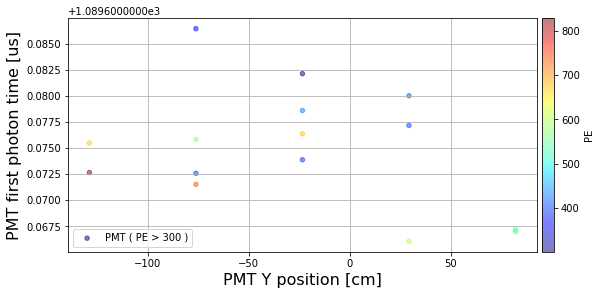

In [104]:
fig, ax = plt.subplots( 1,1, figsize=(10, 4.3) )

out = ax.scatter( fys, ftpeaks, c=fpes, s=20, label='PMT ( PE > {} )'.format(PE_CUT), cmap='jet', alpha=0.5 )
fig.colorbar( out, ax=ax, label="PE", pad=0.01 )

#res = stats.linregress( evtmdf.pmt_y, evtmdf.weight_mean_time ) 
#ax.plot( np.linspace(-150, 100),  np.linspace(-150, 100)*res.slope+res.intercept, lw=2.0, color='red', label='Time fit' )

#ax.scatter(bys,bstarts,color="magenta",marker="x")

ax.set_ylabel("PMT first photon time [us]", fontsize=16)
ax.set_xlabel("PMT Y position [cm]", fontsize=16)
ax.grid()
ax.legend()
ax.legend(loc='lower left')

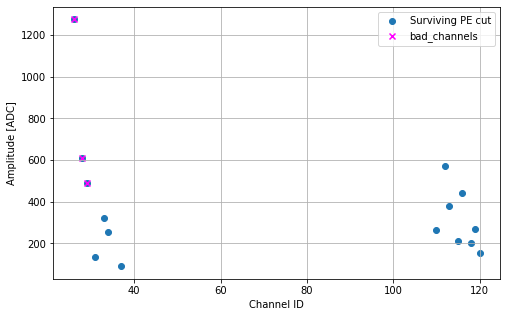

26 EE-BOT-B
28 EE-BOT-B
29 EE-BOT-B
31 EE-BOT-A
33 EE-BOT-A
34 EE-BOT-A
37 EE-BOT-A
110 EW-BOT-B
112 EW-BOT-B
113 EW-BOT-B
115 EW-BOT-B
116 EW-BOT-B
118 EW-BOT-B
119 EW-BOT-B
120 EW-BOT-A


In [105]:
fig = plt.figure(figsize=(8,5))
plt.scatter(fchs,famps,label="Surviving PE cut")
plt.scatter(bchs,bamps,color="magenta",marker="x",label="bad_channels")
plt.grid()
plt.legend()
plt.xlabel("Channel ID")
plt.ylabel("Amplitude [ADC]")
plt.show()
for ch in fchs:
    print(ch,getBoardFromChannel(ch))

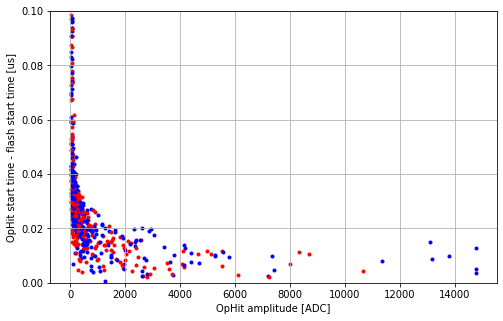

In [106]:
fig = plt.figure(figsize=(8,5))

for ev in np.unique(flashes.event.to_numpy()):
    for f in np.unique(flashes[flashes.event==ev].flash_id.to_numpy()):
        flashT = flashes[(flashes.event==ev)&(flashes.flash_id==f)].flash_time.to_numpy()[0]
        th = hits[(hits.event==ev)&(hits.flash_id==f)&(hits.channel_id==28)].start_time.to_numpy()
        amp = hits[(hits.event==ev)&(hits.flash_id==f)&(hits.channel_id==28)].amplitude.to_numpy()
        
        plt.scatter(amp, th-flashT, marker=".",color="blue",label="Ch 28")
        
        th = hits[(hits.event==ev)&(hits.flash_id==f)&(hits.channel_id==20)].start_time.to_numpy()
        amp = hits[(hits.event==ev)&(hits.flash_id==f)&(hits.channel_id==20)].amplitude.to_numpy()
        
        plt.scatter(amp, th-flashT, marker=".", color="red",label="Ch 20")
        
plt.xlabel("OpHit amplitude [ADC]")
plt.ylabel("OpHit start time - flash start time [us]")
plt.ylim((0,0.1))
plt.grid()
plt.show()

## CHECK DIGITIZED TRIGGER SIGNAL

In [107]:
trigfile = "/icarus/data/users/mvicenzi/pmt-info/runs/9337/dumpWaveforms_globtrg_run9337.root"
triggers = loadSingleFile( trigfile, "waveforms/wftree")

In [108]:
triggers[(triggers.event==30569)]

,run,event,timestamp,channel_id,tstart,nsize,wf
entry,,,,,,,
248,9337,30569,1672384469,24577,1492.088,12960,"[15064, 15068, 15059, 15072, 15059, 15053, 150..."
249,9337,30569,1672384469,24593,1492.088,12960,"[15042, 15047, 15053, 15049, 15064, 15050, 150..."
250,9337,30569,1672384469,24609,1492.088,12960,"[15058, 15068, 15062, 15059, 15063, 15056, 150..."
251,9337,30569,1672384469,24625,1492.088,12960,"[15004, 14978, 14964, 14998, 14969, 14990, 149..."
252,9337,30569,1672384469,24641,1492.120,12968,"[14964, 14963, 14962, 14966, 14960, 14953, 149..."
253,9337,30569,1672384469,24657,1492.120,12968,"[15121, 15118, 15124, 15120, 15121, 15131, 151..."
254,9337,30569,1672384469,24673,1492.120,12968,"[15169, 15159, 15170, 15157, 15165, 15173, 151..."
255,9337,30569,1672384469,24689,1492.120,12960,"[15181, 15178, 15182, 15183, 15186, 15184, 151..."


In [109]:
trig_channels = {
    "WW-TOP-A": 0x6071,
    "WW-BOT-A": 0x6061,
    "WE-TOP-A": 0x6051,
    "WE-BOT-A": 0x6041,
    "EW-TOP-A": 0x6031,
    "EW-BOT-A": 0x6021,
    "EE-TOP-A": 0x6011,
    "EE-BOT-A": 0x6001,
}
trig_channels_ = {
    0x6071:"WW-TOP-A",
    0x6061:"WW-BOT-A",
    0x6051:"WE-TOP-A",
    0x6041:"WE-BOT-A",
    0x6031:"EW-TOP-A",
    0x6021:"EW-BOT-A",
    0x6011:"EE-TOP-A",
    0x6001:"EE-BOT-A",
}

In [110]:
file_corrs = "/icarus/app/users/mvicenzi/OpHit/Trees-data_dl6_fstrmBNBMAJORITY_run9337_15_20221230T062545_20230919T165231-stage0-a320b525-5dbe-4d92-93cd-dfb2004a7fe0_20231010T193129-opwffilter.root"
ttree = uproot.open(file_corrs)
df_wf_corrs = ttree["checker/trigtree"].arrays(outputtype=pd.DataFrame, flatten=False)

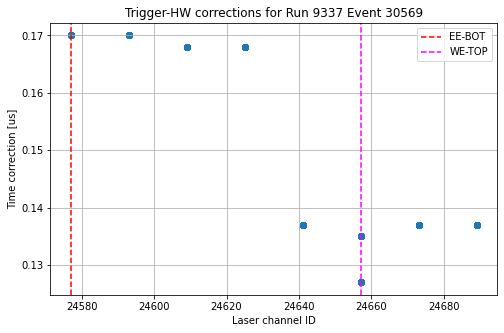

In [111]:
fig = plt.figure(figsize=(8,5))
plt.scatter(df_wf_corrs[df_wf_corrs.event==30569].trg_channel,df_wf_corrs[df_wf_corrs.event==30569].wf_corr)
plt.title("Trigger-HW corrections for Run {} Event {}".format(9337,EVENT))
plt.xlabel("Laser channel ID")
plt.ylabel("Time correction [us]")
plt.axvline(x=trig_channels["EE-BOT-A"], color="red", linestyle="dashed", label="EE-BOT")
plt.axvline(x=trig_channels["WE-TOP-A"], color="magenta", linestyle="dashed", label="WE-TOP")
plt.legend()
plt.grid()
plt.show()

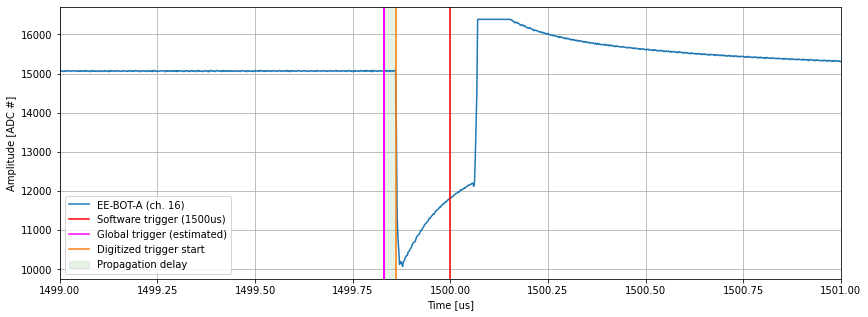

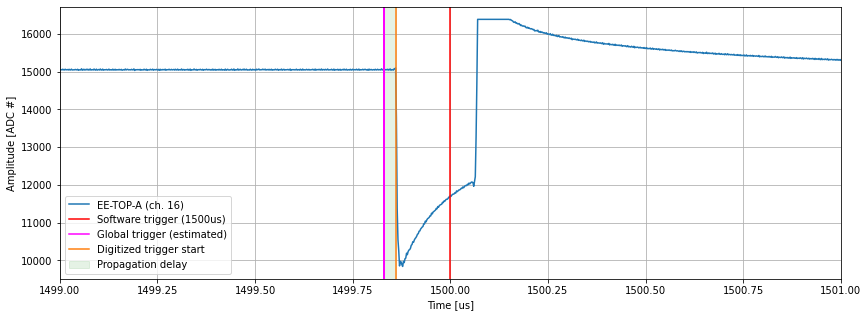

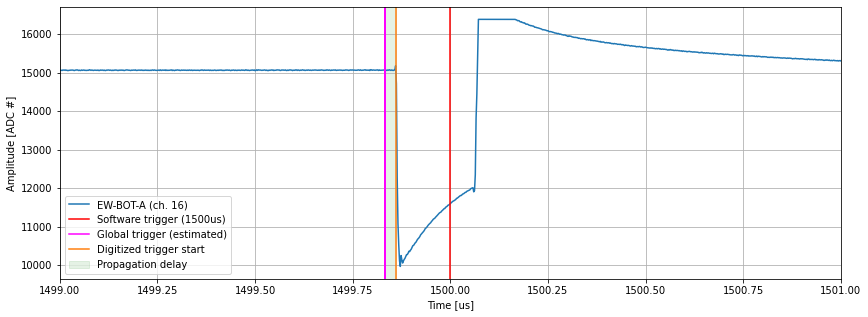

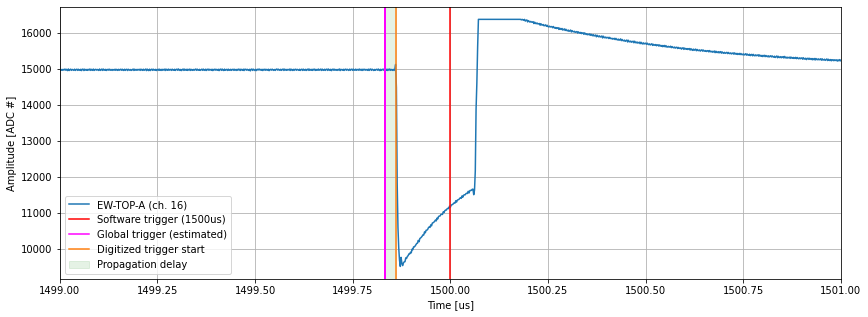

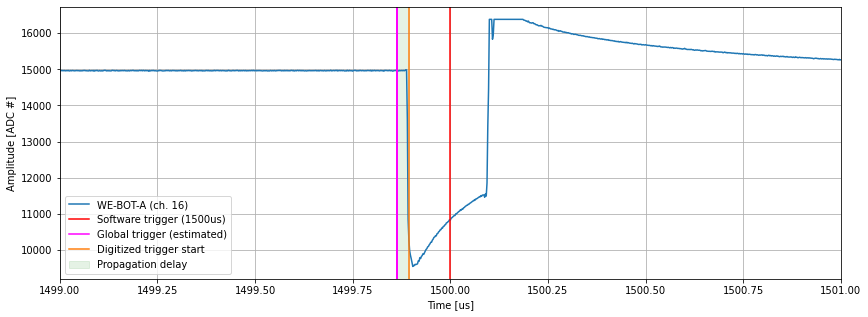

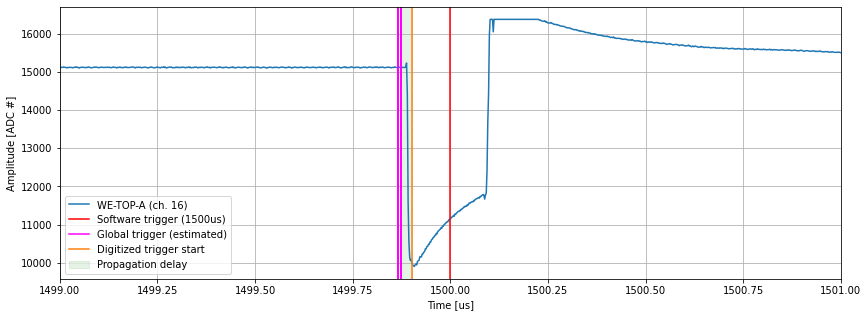

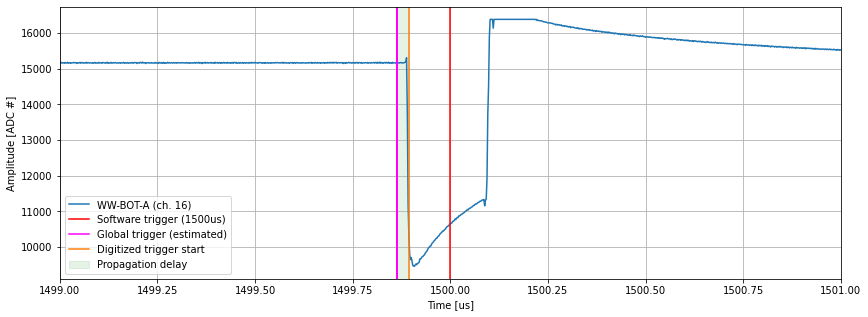

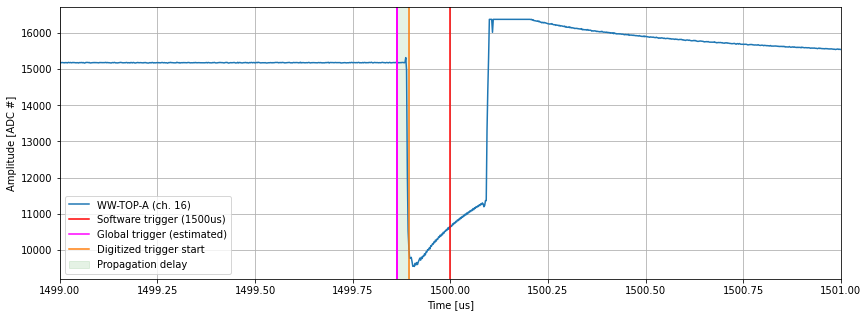

In [112]:
for ch in triggers[triggers.event==30569].channel_id.to_numpy():
    tstart = triggers[(triggers.event==30569) & (triggers.channel_id==ch)].tstart.values[0]
    nsize = triggers[(triggers.event==30569) & (triggers.channel_id==ch)].nsize.values[0]
    tend = tstart + 0.002*nsize
    
    wf = triggers[(triggers.event==30569) & (triggers.channel_id==ch)].wf.values[0]
    tt = np.arange(tstart, tend-0.002, 0.002)
    
    if len(wf) > len(tt):
        tt = np.arange(tstart, tend, 0.002)
    
    fig = plt.figure(figsize=(14, 5))
    
    plt.plot( tt, wf, label=trig_channels_[ch]+" (ch. 16)")
    plt.axvline(x=1500, color="red", label="Software trigger (1500us)")
    
    PHASE_DELAY=0.000
    CABLE_DELAY=-1.*PHASE_DELAY+0.030 # 30ns for EAST, 25ns for WEST
    
    first = True
    for corr in df_wf_corrs[(df_wf_corrs.event==30569)&(df_wf_corrs.trg_channel==ch)].wf_corr.to_numpy():
        if first :
            plt.axvline(x=1500-corr, color="magenta", label="Global trigger (estimated)")
            plt.axvline(x=1500-(corr-CABLE_DELAY), color="#ff7f0e", label="Digitized trigger start")
            plt.axvspan(xmin=1500-corr, xmax=1500-(corr-CABLE_DELAY), color="green", alpha=0.1, label="Propagation delay")
            first = False
        else:
            plt.axvline(x=1500-corr, color="magenta")


    plt.ylabel("Amplitude [ADC #]")
    plt.xlabel("Time [us]")
    plt.xlim((1499,1501))
    plt.legend()
    plt.grid()
    plt.savefig("../figs/validation_run9337_signal_flash_digtrigger_ch{}.png".format(ch))
    plt.show()

In [113]:
df_wf_corrs[(df_wf_corrs.event==30569)&(df_wf_corrs.trg_channel==0x6051)].head(360)

,run,event,timestamp,trg_channel,wf_corr
entry,,,,,
11380,9337,30569,1672384469,24657.0,0.127
11381,9337,30569,1672384469,24657.0,0.127
11382,9337,30569,1672384469,24657.0,0.127
11383,9337,30569,1672384469,24657.0,0.127
11384,9337,30569,1672384469,24657.0,0.127
11390,9337,30569,1672384469,24657.0,0.127
11391,9337,30569,1672384469,24657.0,0.127
11392,9337,30569,1672384469,24657.0,0.127
11393,9337,30569,1672384469,24657.0,0.127


## OpHit amplitude vs tpeak-tstart

In [114]:
flashanafile = "/icarus/app/users/mvicenzi/OpHit/run9337_decode_flashana.root"
fhits = loadSingleFile( flashanafile, "flashana/opflashCryoE_ophittree")

In [115]:
fhits["tdiffs"] = fhits["peak_time"]-fhits["start_time"]

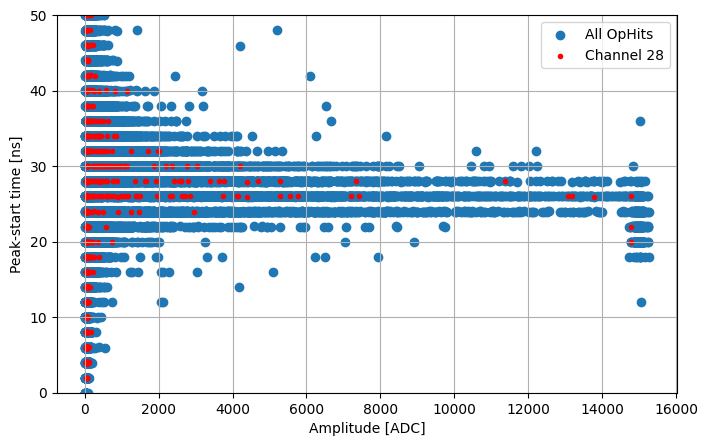

In [116]:
fig = plt.figure(figsize=(8,5),dpi=100)

plt.scatter( fhits["amplitude"], fhits["tdiffs"]*1000, label="All OpHits")
plt.scatter( fhits[fhits.channel_id==28]["amplitude"], fhits[fhits.channel_id==28]["tdiffs"]*1000, marker="." ,  color="red", label="Channel 28")

plt.xlabel("Amplitude [ADC]")
plt.ylabel("Peak-start time [ns]")
plt.grid()
plt.ylim((0,50))
plt.legend()
plt.show()

In [117]:
fflashes = loadSingleFile( flashanafile, "flashana/opflashCryoE_flashtree")
fflashes.drop(columns=["multiplicity","multiplicity_right","multiplicity_left","sum_pe","sum_pe_right","sum_pe_left"],inplace=True)
fflashes["channel_id"] = fflashes.pmt_y.apply( lambda x : np.arange(len(x)) )
fflashes = fflashes.explode(["time_pmt", "pmt_x", "pmt_y", "pe_pmt", "pmt_z", "channel_id","amplitude_pmt"])

In [118]:
flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>0)].head()

,run,event,timestamp,flash_id,flash_time,flash_y,flash_width_y,flash_z,flash_width_z,pmt_x,pmt_y,pmt_z,time_pmt,pe_pmt,amplitude_pmt,channel_id
entry,,,,,,,,,,,,,,,,
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-76.25,-872.900024,-410.326982,3.441883,487.8,0
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-129.050003,-823.02002,-410.323816,3.869212,389.8,2
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-23.450001,-823.02002,-410.30289,1.841913,522.0,3
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,82.150002,-823.02002,-410.24529,2.249133,41.6,4
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-23.450001,-773.140015,-410.327746,9.302574,127.8,6


In [119]:
fflashes[(fflashes.event==EVENT)&(fflashes.flash_id==FLASH)&(fflashes.pe_pmt>0)].head()

,run,event,timestamp,flash_id,flash_time,flash_y,flash_width_y,flash_z,flash_width_z,pmt_x,pmt_y,pmt_z,time_pmt,pe_pmt,amplitude_pmt,channel_id
entry,,,,,,,,,,,,,,,,
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-76.25,-872.900024,-410.326996,3.441883,102.199997,0
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-129.050003,-823.02002,-410.323822,3.869212,98.599998,2
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-23.450001,-823.02002,-410.302887,1.841913,51.400002,3
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,82.150002,-823.02002,-410.2453,2.249133,41.599998,4
302,9337,30569,1672384469,3,-410.357727,-30.865088,72.964561,-333.896973,143.878372,-371.070007,-23.450001,-773.140015,-410.327759,9.302574,127.800003,6


In [120]:
ffstarts = fflashes[(fflashes.event==EVENT)&(fflashes.flash_id==FLASH)&(fflashes.pe_pmt>PE_CUT)].time_pmt.to_numpy()
ffys = fflashes[(fflashes.event==EVENT)&(fflashes.flash_id==FLASH)&(fflashes.pe_pmt>PE_CUT)].pmt_y.to_numpy()

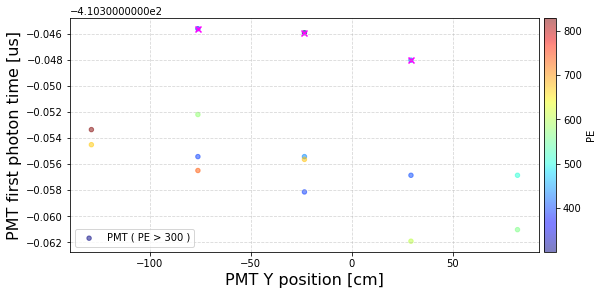

In [121]:
ig, ax = plt.subplots( 1,1, figsize=(10, 4.3) )

out = ax.scatter( ffys, ffstarts, c=fpes, s=20, label='PMT ( PE > {} )'.format(PE_CUT), cmap='jet', alpha=0.5 )
fig.colorbar( out, ax=ax, label="PE", pad=0.01 )

#res = stats.linregress( evtmdf.pmt_y, evtmdf.weight_mean_time ) 
#ax.plot( np.linspace(-150, 100),  np.linspace(-150, 100)*res.slope+res.intercept, lw=2.0, color='red', label='Time fit' )

ax.scatter(bys,bstarts,color="magenta",marker="x")

ax.set_ylabel("PMT first photon time [us]", fontsize=16)
ax.set_xlabel("PMT Y position [cm]", fontsize=16)
ax.grid(alpha=0.5, linestyle="dashed")
ax.legend()
ax.legend(loc='lower left')

## CHECK AFTER REMOVING THE ADDITIONAL 8ns

In [122]:
fold = "/icarus/app/users/mvicenzi/OpHit/Trees-run9337_OLD_TABLE.root"
fnew = "/icarus/app/users/mvicenzi/OpHit/Trees-run9337_NEW_TABLE.root"

told = uproot.open(fold)
tnew = uproot.open(fnew)
do = told["checker/trigtree"].arrays(outputtype=pd.DataFrame, flatten=False)
dn = tnew["checker/trigtree"].arrays(outputtype=pd.DataFrame, flatten=False)

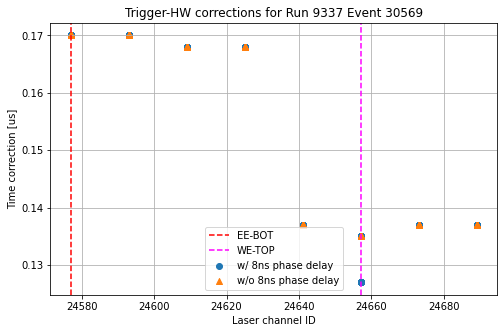

In [123]:
EVENT = 30569
fig = plt.figure(figsize=(8,5))
plt.scatter(do[do.event==EVENT].trg_channel,do[do.event==EVENT].wf_corr,label="w/ 8ns phase delay")
plt.scatter(dn[dn.event==EVENT].trg_channel,dn[dn.event==EVENT].wf_corr,label="w/o 8ns phase delay", marker="^")

plt.title("Trigger-HW corrections for Run {} Event {}".format(9337,EVENT))
plt.xlabel("Laser channel ID")
plt.ylabel("Time correction [us]")
plt.axvline(x=trig_channels["EE-BOT-A"], color="red", linestyle="dashed", label="EE-BOT")
plt.axvline(x=trig_channels["WE-TOP-A"], color="magenta", linestyle="dashed", label="WE-TOP")
plt.legend()
plt.grid()
plt.show()

In [124]:
del do; del dn
do = told["checker/ophittree"].arrays(outputtype=pd.DataFrame, flatten=False)
dn = tnew["checker/ophittree"].arrays(outputtype=pd.DataFrame, flatten=False)

In [125]:
wetopA = getChannelsFromBoard("WE-TOP-A")
wetopB = getChannelsFromBoard("WE-TOP-B")
wetopC = getChannelsFromBoard("WE-TOP-C")

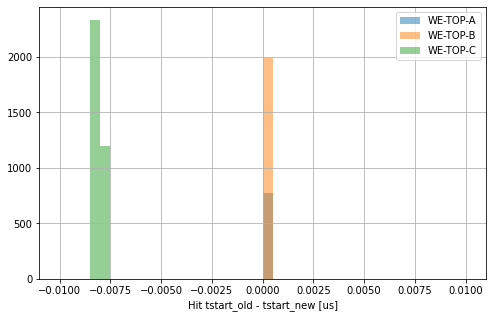

[238 239 235 236 237 230 233 234 232 231 220 223 224 222 221]


In [126]:
fig = plt.figure(figsize=(8,5))

plt.hist( do[(do.channel_id.isin(wetopA))&(do.event==EVENT)].tstart - dn[(dn.channel_id.isin(wetopA))&(dn.event==EVENT)].tstart,
          label="WE-TOP-A", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopB))&(do.event==EVENT)].tstart - dn[(dn.channel_id.isin(wetopB))&(dn.event==EVENT)].tstart,
          label="WE-TOP-B", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopC))&(do.event==EVENT)].tstart - dn[(dn.channel_id.isin(wetopC))&(dn.event==EVENT)].tstart,
          label="WE-TOP-C", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.xlabel("Hit tstart_old - tstart_new [us]")
plt.legend()
plt.grid()
plt.show()
print(wetopC)

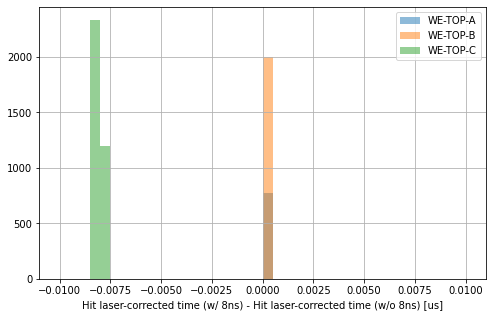

[238 239 235 236 237 230 233 234 232 231 220 223 224 222 221]


In [134]:
fig = plt.figure(figsize=(8,5))

plt.hist( do[(do.channel_id.isin(wetopA))&(do.event==EVENT)].tstart_corr - dn[(dn.channel_id.isin(wetopA))&(dn.event==EVENT)].tstart_corr,
          label="WE-TOP-A", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopB))&(do.event==EVENT)].tstart_corr - dn[(dn.channel_id.isin(wetopB))&(dn.event==EVENT)].tstart_corr,
          label="WE-TOP-B", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopC))&(do.event==EVENT)].tstart_corr - dn[(dn.channel_id.isin(wetopC))&(dn.event==EVENT)].tstart_corr,
          label="WE-TOP-C", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.xlabel("Hit laser-corrected time (w/ 8ns) - Hit laser-corrected time (w/o 8ns) [us]")
plt.legend()
plt.grid()
plt.show()
print(wetopC)

Old - new = -8ns --> this means that all channels in WE-TOP-C are now +8ns than before! This seems to be bringing all the boards in the WEST to the "same" hw correction. 

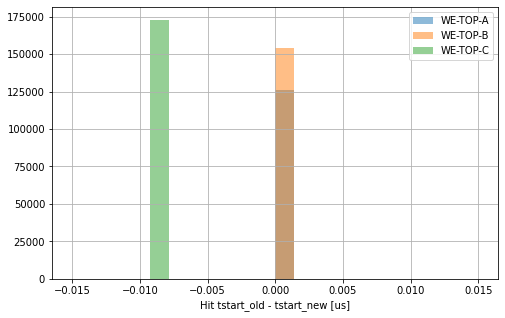

[238 239 235 236 237 230 233 234 232 231 220 223 224 222 221]


In [128]:
fig= plt.figure(figsize=(8,5))

plt.hist( do[(do.channel_id.isin(wetopA))].tstart - dn[(dn.channel_id.isin(wetopA))].tstart,
          label="WE-TOP-A", range=(-0.015,0.015), bins=22, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopB))].tstart - dn[(dn.channel_id.isin(wetopB))].tstart,
          label="WE-TOP-B", range=(-0.015,0.015), bins=22, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopC))].tstart - dn[(dn.channel_id.isin(wetopC))].tstart,
          label="WE-TOP-C", range=(-0.015,0.015), bins=21, alpha=0.5 )
plt.xlabel("Hit tstart_old - tstart_new [us]")
plt.legend()
plt.grid()
plt.show()
print(wetopC)

# COMPARE DUMPS (removing 8ns)

In [129]:
Ndump_file = "../dump_run9337_test8ns.csv"
Nres_file = "../output/residuals/Run_2/run9337_residuals_test8ns.csv"

In [130]:
Ndfres = pd.read_csv(Nres_file)
Ndf = pd.read_csv(Ndump_file)

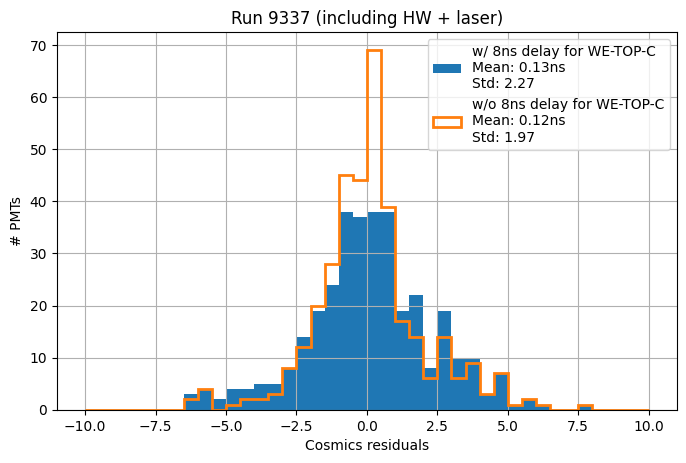

In [131]:
fig = plt.figure(figsize=(8,5),dpi=100)

mi,ma = -10.,10.
b = 0.5
n = int((ma-mi)/b)
plt.hist(dfres["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="bar",
         label="w/ 8ns delay for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(np.mean(dfres["mean_residual_ns"].to_numpy()),np.std(dfres["mean_residual_ns"].to_numpy())))
plt.hist(Ndfres["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns delay for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(np.mean(Ndfres["mean_residual_ns"].to_numpy()),np.std(Ndfres["mean_residual_ns"].to_numpy())))

plt.grid()
plt.title("Run 9337 (including HW + laser)")
plt.xlabel("Cosmics residuals")
plt.ylabel("# PMTs")
plt.legend()
plt.show()

In [132]:
Nres_file2 = "../output/residuals/Run_2/run10085_residuals_test8ns.csv"
Ndf2 = pd.read_csv(Nres_file2)

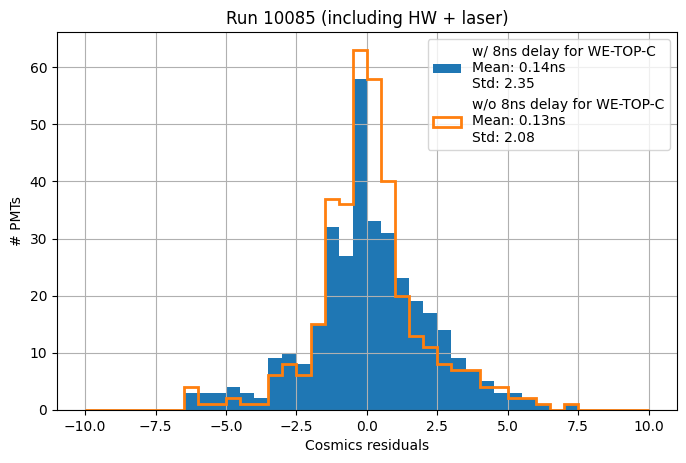

In [133]:
fig = plt.figure(figsize=(8,5),dpi=100)

mi,ma = -10.,10.
b = 0.5
n = int((ma-mi)/b)
plt.hist(df2["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="bar",
         label="w/ 8ns delay for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(np.mean(df2["mean_residual_ns"].to_numpy()),np.std(df2["mean_residual_ns"].to_numpy())))
plt.hist(Ndf2["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns delay for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(np.mean(Ndf2["mean_residual_ns"].to_numpy()),np.std(Ndf2["mean_residual_ns"].to_numpy())))

plt.grid()
plt.title("Run 10085 (including HW + laser)")
plt.xlabel("Cosmics residuals")
plt.ylabel("# PMTs")
plt.legend()
plt.show()